In [1]:
#dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from weather_api_SALR import weather_api_SALR

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
#url for api call
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_SALR

#city data list

cities_data = []


#print start of api call
print('Starting API Call')
print('-----------------')

#counters for number of cities

group_count = 1
add_count = 1

for city in cities:
    
    time.sleep(1.2)
    
    if (group_count % 50 == 0) and (group_count >= 50):
        
        add_count += 1
        group_count = 0
        
    #url for every city
    
    cities_url = api_url + '&q=' + city
    
    print('API record set %s # %s | %s' % (add_count, group_count, city))
    
    #new group number
    group_count += 1
    
    try:

        cities_weather = requests.get(cities_url).json()
    
        cities_clouds = cities_weather["clouds"]["all"]
        cities_country = cities_weather["sys"]["country"]
        city_date = cities_weather["dt"]
        cities_high_temp = cities_weather["main"]["temp_max"]
        cities_humidity = cities_weather["main"]["humidity"]
        cities_latitude = cities_weather["coord"]["lat"]
        cities_longitude = cities_weather["coord"]["lon"]
        cities_wind = cities_weather["wind"]["speed"]

        cities_data.append({'city': city,
                            'clouds': cities_clouds,
                            'country': cities_country,
                            'date': city_date,
                            'high_temp': cities_high_temp,
                            'humidity': cities_humidity,
                            'latitude': cities_latitude,
                            'longitude': cities_longitude,
                            'wind': cities_wind})
        
        print(cities_country)

    except:
        print('Error. City data not found. Next city. . .')
        pass

#api call done
print('---------------------' + '\n' + '| Finished API Call |' + '\n' + '---------------------')

Starting API Call
-----------------
API record set 1 # 1 | lebu
CL
API record set 1 # 2 | biltine
TD
API record set 1 # 3 | saldanha
ZA
API record set 1 # 4 | illoqqortoormiut
Error. City data not found. Next city. . .
API record set 1 # 5 | vaini
TO
API record set 1 # 6 | havre-saint-pierre
CA
API record set 1 # 7 | jamestown
US
API record set 1 # 8 | mataura
NZ
API record set 1 # 9 | bethel
US
API record set 1 # 10 | bambous virieux
MU
API record set 1 # 11 | isangel
VU
API record set 1 # 12 | punta arenas
CL
API record set 1 # 13 | hilo
US
API record set 1 # 14 | miharu
JP
API record set 1 # 15 | kapaa
US
API record set 1 # 16 | albany
US
API record set 1 # 17 | pimentel
PE
API record set 1 # 18 | plettenberg bay
ZA
API record set 1 # 19 | vila franca do campo
PT
API record set 1 # 20 | pirovskoye
RU
API record set 1 # 21 | andenes
NO
API record set 1 # 22 | ushuaia
AR
API record set 1 # 23 | akdepe
TM
API record set 1 # 24 | barrow
US
API record set 1 # 25 | groningen
NL
API record

IS
API record set 5 # 7 | pangkalanbuun
ID
API record set 5 # 8 | axim
GH
API record set 5 # 9 | kazachinskoye
RU
API record set 5 # 10 | airai
TL
API record set 5 # 11 | ketchikan
US
API record set 5 # 12 | hithadhoo
MV
API record set 5 # 13 | misratah
LY
API record set 5 # 14 | nalut
LY
API record set 5 # 15 | katima mulilo
NA
API record set 5 # 16 | belaya gora
RU
API record set 5 # 17 | tabialan
Error. City data not found. Next city. . .
API record set 5 # 18 | hualmay
PE
API record set 5 # 19 | ostrovnoy
RU
API record set 5 # 20 | goundam
ML
API record set 5 # 21 | lorengau
PG
API record set 5 # 22 | sinnamary
GF
API record set 5 # 23 | chernyshevskiy
RU
API record set 5 # 24 | huangpi
CN
API record set 5 # 25 | ljubinje
BA
API record set 5 # 26 | margate
GB
API record set 5 # 27 | martinsville
US
API record set 5 # 28 | rustenburg
ZA
API record set 5 # 29 | barentsburg
Error. City data not found. Next city. . .
API record set 5 # 30 | yar-sale
RU
API record set 5 # 31 | puerto ay

API record set 9 # 23 | meulaboh
ID
API record set 9 # 24 | rafai
CF
API record set 9 # 25 | itoman
JP
API record set 9 # 26 | pierre
US
API record set 9 # 27 | sompeta
IN
API record set 9 # 28 | voznesenye
RU
API record set 9 # 29 | camopi
GF
API record set 9 # 30 | athabasca
CA
API record set 9 # 31 | hindaun
IN
API record set 9 # 32 | itacare
BR
API record set 9 # 33 | katobu
ID
API record set 9 # 34 | tautira
PF
API record set 9 # 35 | salalah
OM
API record set 9 # 36 | saint george
US
API record set 9 # 37 | karwar
IN
API record set 9 # 38 | padang
ID
API record set 9 # 39 | kupang
ID
API record set 9 # 40 | goryachegorsk
RU
API record set 9 # 41 | taunggyi
MM
API record set 9 # 42 | filimonovo
RU
API record set 9 # 43 | cinco esquinas
CR
API record set 9 # 44 | uvira
CD
API record set 9 # 45 | grenfell
AU
API record set 9 # 46 | irbeyskoye
RU
API record set 9 # 47 | bousso
TD
API record set 9 # 48 | jawhar
SO
API record set 9 # 49 | deogarh
IN
API record set 10 # 0 | lakes entran

In [4]:
cities_data

[{'city': 'lebu',
  'clouds': 0,
  'country': 'CL',
  'date': 1586056262,
  'high_temp': 54.43,
  'humidity': 75,
  'latitude': -37.62,
  'longitude': -73.65,
  'wind': 14.79},
 {'city': 'biltine',
  'clouds': 97,
  'country': 'TD',
  'date': 1586056264,
  'high_temp': 84,
  'humidity': 13,
  'latitude': 14.53,
  'longitude': 20.92,
  'wind': 8.61},
 {'city': 'saldanha',
  'clouds': 81,
  'country': 'ZA',
  'date': 1586056265,
  'high_temp': 57.2,
  'humidity': 93,
  'latitude': -33.01,
  'longitude': 17.94,
  'wind': 6.93},
 {'city': 'vaini',
  'clouds': 75,
  'country': 'TO',
  'date': 1586056267,
  'high_temp': 78.8,
  'humidity': 69,
  'latitude': -21.2,
  'longitude': -175.2,
  'wind': 8.05},
 {'city': 'havre-saint-pierre',
  'clouds': 90,
  'country': 'CA',
  'date': 1586056269,
  'high_temp': 30.2,
  'humidity': 92,
  'latitude': 50.23,
  'longitude': -63.6,
  'wind': 2.24},
 {'city': 'jamestown',
  'clouds': 1,
  'country': 'US',
  'date': 1586056270,
  'high_temp': 48.2,
  'hu

In [5]:
cities_data_df = pd.DataFrame()

In [6]:
cities_data_df = pd.DataFrame.from_dict(cities_data, orient='columns')

In [7]:
cities_data_df

city  clouds country        date  high_temp  humidity  \
0                  lebu       0      CL  1586056262      54.43        75   
1               biltine      97      TD  1586056264      84.00        13   
2              saldanha      81      ZA  1586056265      57.20        93   
3                 vaini      75      TO  1586056267      78.80        69   
4    havre-saint-pierre      90      CA  1586056269      30.20        92   
..                  ...     ...     ...         ...        ...       ...   
579            pochutla      37      MX  1586057080      80.01        76   
580            vallenar      98      CL  1586057081      68.70        44   
581           nantucket      20      US  1586057082      39.99        93   
582                sola      90      VU  1586057084      80.60        94   
583    villa carlos paz      86      AR  1586057085      69.01        77   

     latitude  longitude   wind  
0      -37.62     -73.65  14.79  
1       14.53      20.92   8.61  
2      -33.01      17.94   6.93  
3      -21.20    -175.20   8.05  
4       50.23     -63.60   2.24  
..        ...        ...    ...  
579     15.74     -96.47   6.42  
580    -28.57     -70.76   0.36  
581     41.28     -70.10   5.82  
582    -13.88     167.55  32.61  
583    -31.42     -64.50  10.29  

[584 rows x 9 columns]

In [8]:
#save so i can go to bed its 2:24am lmao. finish tomorrow
cities_data_df.to_csv('cities_data_df.csv', index = False, header=True)

In [15]:
cities_data_df.head()

city  clouds country        date  high_temp  humidity  \
0                lebu       0      CL  1586056262      54.43        75   
1             biltine      97      TD  1586056264      84.00        13   
2            saldanha      81      ZA  1586056265      57.20        93   
3               vaini      75      TO  1586056267      78.80        69   
4  havre-saint-pierre      90      CA  1586056269      30.20        92   

   latitude  longitude   wind  
0    -37.62     -73.65  14.79  
1     14.53      20.92   8.61  
2    -33.01      17.94   6.93  
3    -21.20    -175.20   8.05  
4     50.23     -63.60   2.24

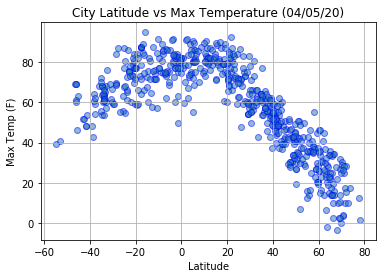

In [39]:
#plot 1: latitude vs temperature

plt.scatter(cities_data_df['latitude'], cities_data_df['high_temp'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_temp.png')

plt.show()

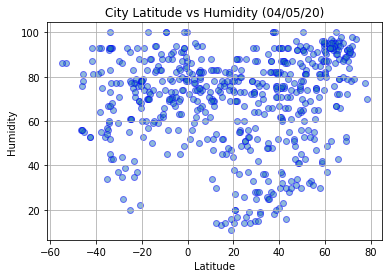

In [41]:
#plot 2: Latitude & Humidity

plt.scatter(cities_data_df['latitude'], cities_data_df['humidity'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_humidity.png')

plt.show()

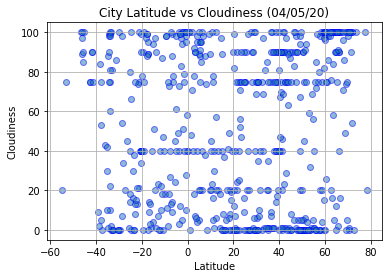

In [42]:
#plot 3: latitude vs cloudiness

plt.scatter(cities_data_df['latitude'], cities_data_df['clouds'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_clouds.png')

plt.show()

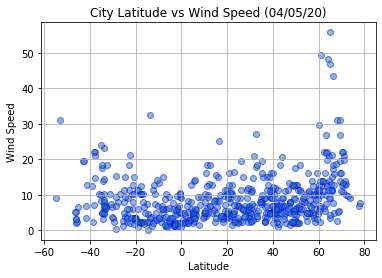

In [43]:
#plot 4: latitude vs wind speed

plt.scatter(cities_data_df['latitude'], cities_data_df['wind'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_wind.png')

plt.show()

In [ ]:
#make the linear regression function - did this in group project :)

def linreg_plot(x_values, y_values, title, )